#### In this notebook, we use different types of models like correlation, heat map, pairplot, linear regression, logistoc regression and random forest regressor to understand the relationship between the datasets

In [1]:
#importing packages and modules
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,r2_score,confusion_matrix,mean_squared_error,mean_absolute_error,mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
#read data 
df_cleaned = pd.read_csv('dataset/cleaned_data_googleplaystore.csv')

In [3]:
#print the first 5 data from the data file
df_cleaned.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content_numerical,Category_numerical
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4,0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0


In [4]:
#check the numaric columns
df_cleaned.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Content_numerical',
       'Category_numerical'],
      dtype='object')

In [5]:
#printing the data type of the columns
for i in df_cleaned.columns:
    if df_cleaned[i].dtype != 'object':
        print(i,' type ',df_cleaned[i].dtype)

Unnamed: 0  type  int64
Rating  type  float64
Reviews  type  float64
Size  type  float64
Installs  type  float64
Price  type  float64
Content_numerical  type  int64
Category_numerical  type  int64


In [6]:
#removing unnamed: 0 
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0'])

In [7]:
#describe 
df_cleaned.describe()

,Rating,Reviews,Size,Installs,Price,Content_numerical,Category_numerical
count,9360.000000,9.360000e+03,7723.00000,9.360000e+03,9360.000000,9360.000000,9360.000000
mean,4.191838,5.143767e+05,22.97012,1.790875e+07,0.961279,1.488462,16.799466
std,0.515263,3.145023e+06,23.44995,9.126637e+07,15.821640,1.022388,8.276260
min,1.000000,1.000000e+00,0.00800,1.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,1.867500e+02,5.30000,1.000000e+04,0.000000,1.000000,11.000000
50%,4.300000,5.955000e+03,14.00000,5.000000e+05,0.000000,1.000000,14.000000
75%,4.500000,8.162750e+04,33.00000,5.000000e+06,0.000000,1.000000,25.000000
max,5.000000,7.815831e+07,100.00000,1.000000e+09,400.000000,5.000000,32.000000


In [8]:
#correlation
df_cleaned.corr()

,Rating,Reviews,Size,Installs,Price,Content_numerical,Category_numerical
Rating,1.000000,0.068133,0.083643,0.051337,-0.021919,0.019800,-0.035154
Reviews,0.068133,1.000000,0.240381,0.641605,-0.009824,0.070484,0.000888
Size,0.083643,0.240381,1.000000,0.162707,-0.026274,0.190131,-0.149367
Installs,0.051337,0.641605,0.162707,1.000000,-0.011895,0.053305,0.022778
Price,-0.021919,-0.009824,-0.026274,-0.011895,1.000000,-0.014099,-0.012920
Content_numerical,0.019800,0.070484,0.190131,0.053305,-0.014099,1.000000,-0.105935
Category_numerical,-0.035154,0.000888,-0.149367,0.022778,-0.012920,-0.105935,1.000000


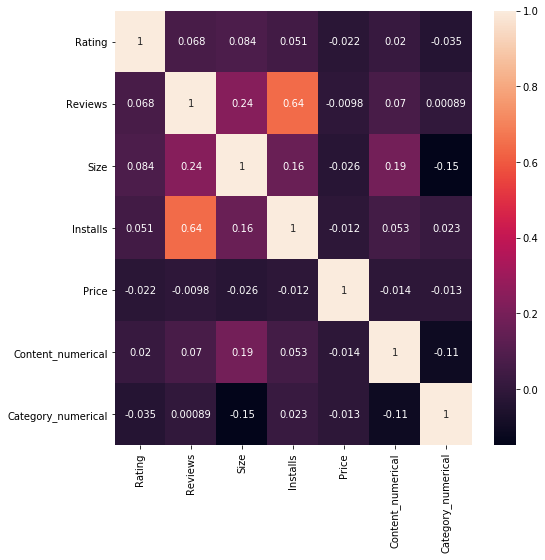

In [9]:
#heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df_cleaned.corr(),annot=True)

In [10]:
#plot pairplot
df_cleaned.replace(np.nan,0)
pairplot_data = df_cleaned[['Price','Rating','Reviews','Installs','Content_numerical','Category_numerical','Type']]

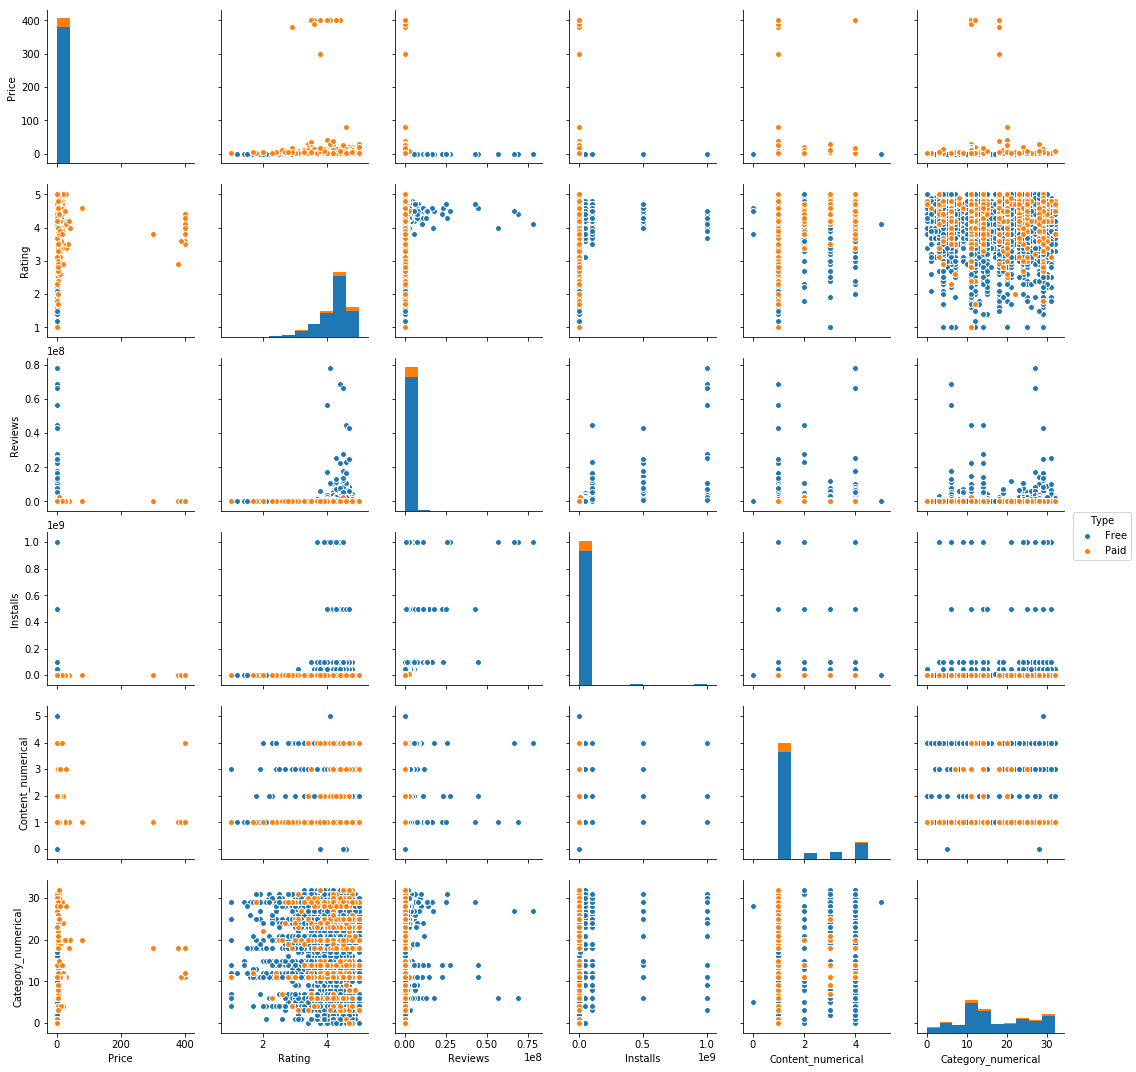

In [11]:
sns.pairplot(pairplot_data,hue='Type')

In [12]:
#apply Linear regression model 
df_cleaned = df_cleaned.replace(np.nan,0)
features = ['Reviews','Size','Installs','Price','Content_numerical','Category_numerical']
X = df_cleaned[features]
Y = df_cleaned.Rating

In [13]:
# Build your model - defining training and test data sets
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2, random_state= 40)

In [14]:
# apply Linear Regression
Lr = LinearRegression()
Lr.fit(X_train,y_train)
y_pred = Lr.predict(X_test)

In [15]:
mse = mean_squared_error(y_test,y_pred)
mse_train_lr = mean_squared_error(y_train,Lr.predict(X_train))
r2 = r2_score(y_test,y_pred)
print("The mean squared error (training) is: %.4f\n"% mse)
print("The r2 score is: %.4f\n" % r2)
print("The mean squared error (training) is: %.4f\n"% mse_train_lr)

The mean squared error (training) is: 0.2724

The r2 score is: 0.0010

The mean squared error (training) is: 0.2612



In [16]:
#apply DecisionTreeRegressor 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
regressor = DecisionTreeRegressor(random_state=42, max_depth=4)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [17]:
y_pred = regressor.predict(X_test)
score = r2_score(y_pred, y_test)
print("\nThe r2 score is: %.4f\n" % score)
mse_test = mean_squared_error(y_pred, y_test)
mse_train = mean_squared_error(regressor.predict(X_train), y_train)
print("The mean squared error (testing) is: %.4f\n" % mse_test)
print("The mean squared error (training) is: %.4f\n" % mse_train)


The r2 score is: -7.0396

The mean squared error (testing) is: 0.2356

The mean squared error (training) is: 0.2369



In [18]:
#apply the diffrent max_depth in range of [1,10] 
mse_list = [] 
r2_list = []
for i in range(1,10):
    regressor = DecisionTreeRegressor(random_state=42, max_depth=i)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = r2_score(y_pred, y_test)
    mse_test = mean_squared_error(y_pred, y_test)
    r2_list.append(score)
    mse_list.append(mse_test)

In [22]:
print('Average Mse with max_depth [1,10] : ',sum(mse_list)/len(mse_list))

Average Mse with max_depth [1,10] :  0.24412919168999572


In [23]:
#apply random forest regressor
forest_model = RandomForestRegressor(n_estimators=100, max_features=6, min_samples_leaf=10)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
score = r2_score(forest_pred, y_test)
print("\nThe r2 score is: %.4f\n" % score)
mse_test = mean_squared_error(forest_pred, y_test)
mse_train = mean_squared_error(regressor.predict(X_train), y_train)
print("The mean squared error (testing) is: %.4f\n" % mse_test)
print("The mean squared error (training) is: %.4f\n" % mse_train)


The r2 score is: -3.4035

The mean squared error (testing) is: 0.2165

The mean squared error (training) is: 0.1873

